###**AVIATION ACCIDENTS DATA CLEANSING & ANALYSIS**

##**Introduction**
This project aims at cleaning and analyzing data for aviation accidents that occurred in the United States, all its territories as well as international waters. The analysis will derive insights that will help one of my clients to make a decision on the type of aircrafts to purchase.

##**Objectives**
- Cleaning the data
- Analysing the data and getting insights
- Determining which aircrafts has low risk
- Presenting the findings and actionable insights to the client

##**Data content & Source**
The aviation accidents data contains information about aircraft accidents in USA, its territories and international waters. It is contained in 2 CSV files downloaded from Kaggle.com (URL: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses?select=AviationData.csv) 

##**Data Analysis Methods**

The data is analyzed using python libraries including:
- Pandas: Data manipulation and analysis
- Matplotlib: Data visualization 
- Seaborn: Statistical plotting

In [1]:
#Importing the necessary python libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#**DATA CLEANSING**

In [2]:
#Importing and displaying the first data set 
df1=pd.read_csv("AviationData.csv",encoding='cp1252',low_memory=False)
df1.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [3]:
#Importing and displaying the second data set 
df2=pd.read_csv("USState_Codes.csv",encoding='cp1252',low_memory=False)
df2.head(2)

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK


In [4]:
#Checking the dimensions of the first data sets 
df1.shape

(88889, 31)

In [5]:
#Checking the dimensions of the second data sets 
df2.shape

(62, 2)

In [6]:
#Getting a summary of the first data set 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
#Getting a summary of the first data set 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [8]:
# getting the percentage of null values in each column (first data set)
percent_missing = df1.isnull().sum() * 100 / len(df1)
percent_missing

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

In [9]:
# getting the percentage of null values in each column (second data set)
percent_missing = df2.isnull().sum() * 100 / len(df2)
percent_missing

US_State        0.0
Abbreviation    0.0
dtype: float64

In [10]:
#dropping columns with more than 30% of missing data 
threshold = 0.3
min_count = int((1 - threshold) * len(df1))
df1 = df1.dropna(axis=1, thresh=min_count)

In [11]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
percent_missing

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Injury.Severity            1.124999
Aircraft.damage            3.593246
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
Purpose.of.flight          6.965991
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
Report.Status              7.181991
Publication.Date          15.492356
dtype: float64

In [12]:
#checking the dimension of the new data frame 1
df1.shape

(88889, 22)

In [13]:
#check for duplicate 
df1_duplicates=df1.duplicated()
df1_duplicates


0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [14]:
#Replace dots with hivens on column names in df1
df1.columns = df1.columns.str.replace('.', '_')

In [15]:
#displaying columns 
print(list(df1.columns))

['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date', 'Location', 'Country', 'Injury_Severity', 'Aircraft_damage', 'Registration_Number', 'Make', 'Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Report_Status', 'Publication_Date']


In [16]:
#dropping other unecessary columns 
df1 = df1.drop(['Event_Id', 'Accident_Number','Registration_Number','Publication_Date'], axis=1)

In [17]:
#displaying remaining columns 
print(list(df1.columns))

['Investigation_Type', 'Event_Date', 'Location', 'Country', 'Injury_Severity', 'Aircraft_damage', 'Make', 'Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Report_Status']


In [18]:
#convert Event_Date column to datetime 
df1['Event_Date'] = pd.to_datetime(df1['Event_Date'])

In [19]:
#dropping rows with missing entries 
df1 = df1.dropna()

In [20]:
#confirming there are no rows with misisng numbers 
percent_missing = df1.isnull().sum() * 100 / len(df1)
percent_missing

Investigation_Type        0.0
Event_Date                0.0
Location                  0.0
Country                   0.0
Injury_Severity           0.0
Aircraft_damage           0.0
Make                      0.0
Model                     0.0
Amateur_Built             0.0
Number_of_Engines         0.0
Engine_Type               0.0
Purpose_of_flight         0.0
Total_Fatal_Injuries      0.0
Total_Serious_Injuries    0.0
Total_Minor_Injuries      0.0
Total_Uninjured           0.0
Weather_Condition         0.0
Report_Status             0.0
dtype: float64

In [21]:
#confirming number of remaining rows and columns 
df1.shape

(63072, 18)

In [22]:
#Removing white spaces in column 'Location'
df1['Location'] = df1['Location'].str.replace(' ', '')

In [23]:
#Coming up with a column 'location_code' from location
df1['Location_code']=df1['Location'].str.split(',').str[1].str.strip()

In [24]:
#displaying columns 
print(list(df1.columns))

['Investigation_Type', 'Event_Date', 'Location', 'Country', 'Injury_Severity', 'Aircraft_damage', 'Make', 'Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Report_Status', 'Location_code']


In [25]:
#displaying the first 2 rows 
df1.head(1)

,Investigation_Type,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Report_Status,Location_code
0,Accident,1948-10-24,"MOOSECREEK,ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,ID


In [26]:
#checking what what percentage of data is from United States   
Countrycount = df1.groupby('Country').size()
proportion = (Countrycount / Countrycount.sum()) * 100
print(proportion)

Country
ATLANTIC OCEAN     0.085616
Afghanistan        0.001585
American Samoa     0.004756
Angola             0.003171
Antarctica         0.001585
                    ...    
UN                 0.007927
United Kingdom     0.001585
United States     99.131152
Venezuela          0.003171
West Indies        0.006342
Length: 81, dtype: float64


In [27]:
#dropping other countries given that USA represent 99% of the data 
df1 = df1[df1['Country'] == 'United States']

In [28]:
#checking what what percentage of data is from United States   
Countrycount = df1.groupby('Country').size()
proportion = (Countrycount / Countrycount.sum()) * 100
print(proportion)

Country
United States    100.0
dtype: float64


In [29]:
#changing the name of 'Abbreviation' column to Location_code
df2 = df2.rename(columns={'Abbreviation': 'Location_code'})

In [30]:
# Merge the 2 data sets using the 'ID' column
df = pd.merge(df1, df2, on='Location_code')
#displaying columns 
print(list(df.columns))

['Investigation_Type', 'Event_Date', 'Location', 'Country', 'Injury_Severity', 'Aircraft_damage', 'Make', 'Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Report_Status', 'Location_code', 'US_State']


In [31]:
# Displaying the columns and their data types
print(df.dtypes)

Investigation_Type                object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Injury_Severity                   object
Aircraft_damage                   object
Make                              object
Model                             object
Amateur_Built                     object
Number_of_Engines                float64
Engine_Type                       object
Purpose_of_flight                 object
Total_Fatal_Injuries             float64
Total_Serious_Injuries           float64
Total_Minor_Injuries             float64
Total_Uninjured                  float64
Weather_Condition                 object
Report_Status                     object
Location_code                     object
US_State                          object
dtype: object


In [41]:
#For data uniformity capitalize data on 'Make' and 'Model'
df['Make'] = df['Make'].str.upper()
df['Model'] = df['Model'].str.upper()

In [42]:
# Specify the file path to eport df
file_path = 'C:/Users/jgatonye/Documents/DS_COURSE/PHASE1/PROJECT1/Project-Phase-1/df.csv'
# Export to CSV
df.to_csv(file_path, index=False)


##**Data Analysis & Visualization**

In [44]:
#Top 10 most used aircraft makes by percentage-We will assume that aircraft makes with the most reported accidents are the most popular and used
top_10_makes = df['Make'].value_counts(normalize=True).head(10) * 100
print(top_10_makes)

Make
CESSNA      33.610231
PIPER       18.483306
BEECH        6.301418
BELL         2.778578
MOONEY       1.632575
GRUMMAN      1.606966
BELLANCA     1.402094
HUGHES       1.081981
BOEING       1.043567
ROBINSON     0.934729
Name: proportion, dtype: float64


##**Bar chart showing top ten aircrafts with the most accidents**

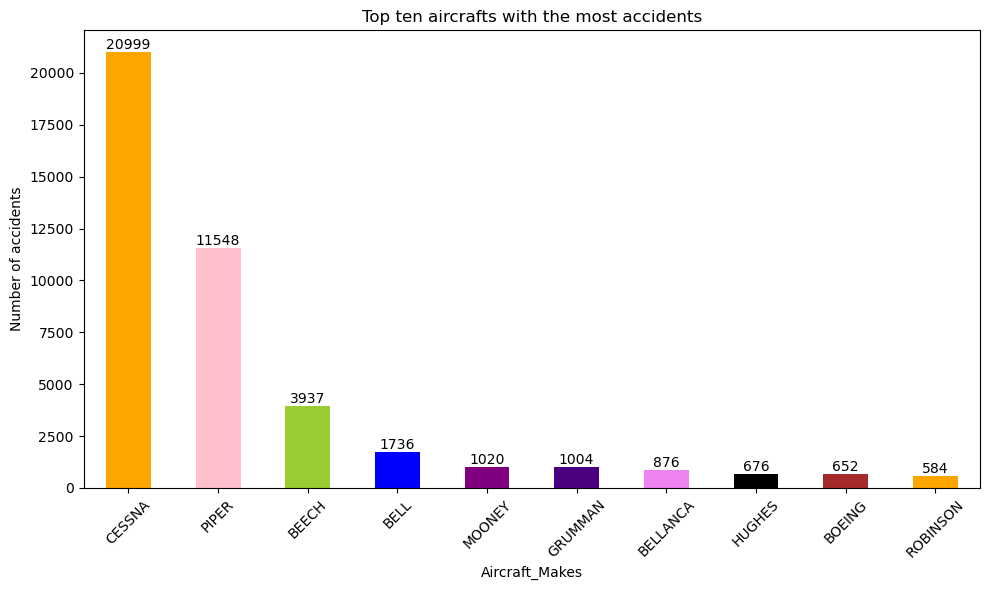

In [62]:
# getting a count of every aircraft make and sorting top 10
top_ten_aircrafts_makes_accidents = df['Make'].value_counts().head(10)
# getting colours
colors = ['orange','pink','yellow' 'green', 'blue', 'purple','indigo','violet','black','brown']
# Plotting the a bar graph of to 10 aircrafts
plt.figure(figsize=(10, 6))
bar=top_ten_aircrafts_makes_accidents.plot(kind='bar', color=colors)
#capture number of accidents on top of the bar
for p in bar.patches:
            bar.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
      
plt.title('Top ten aircrafts with the most accidents')
plt.xlabel('Aircraft_Makes')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()